<a href="https://colab.research.google.com/github/RishiYadav03/K-means-Clustering-Algorithm/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
from ast import increment_lineno
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
 #load the data
 iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#load data set
data = sns.load_dataset("iris")
data.head(8)
#prepare the training set

# X = feature values, all the columns expect the last column
x = data.iloc[:, :-1]

In [5]:
#Define target and predictors
df = pd.DataFrame(data = iris.data, columns = ['sepal length','sepal width','petal length','petal width'])
df['target']=pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
  if df.iloc[i]['target'] == 0:
    species.append('setosa')
  elif df.iloc[i]['target'] == 1:
    species.append('versicolor')
  elif df.iloc[i]['target'] == 2:
    species.append('virginica')
df['Species'] = species


In [6]:
df

,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


Text(0, 0.5, 'Sepal Length')

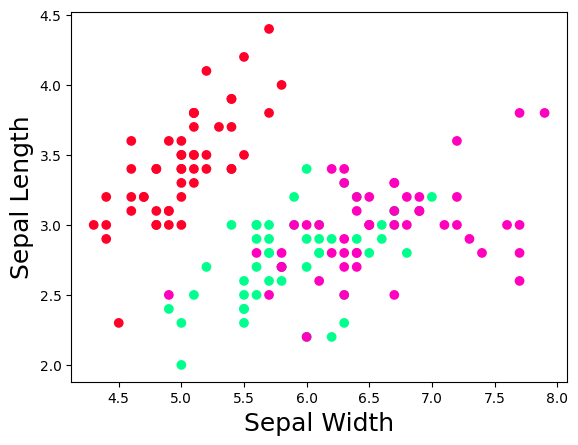

In [7]:
#Look of our data through scatter plot
plt.scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='gist_rainbow')

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal Length', fontsize=18)

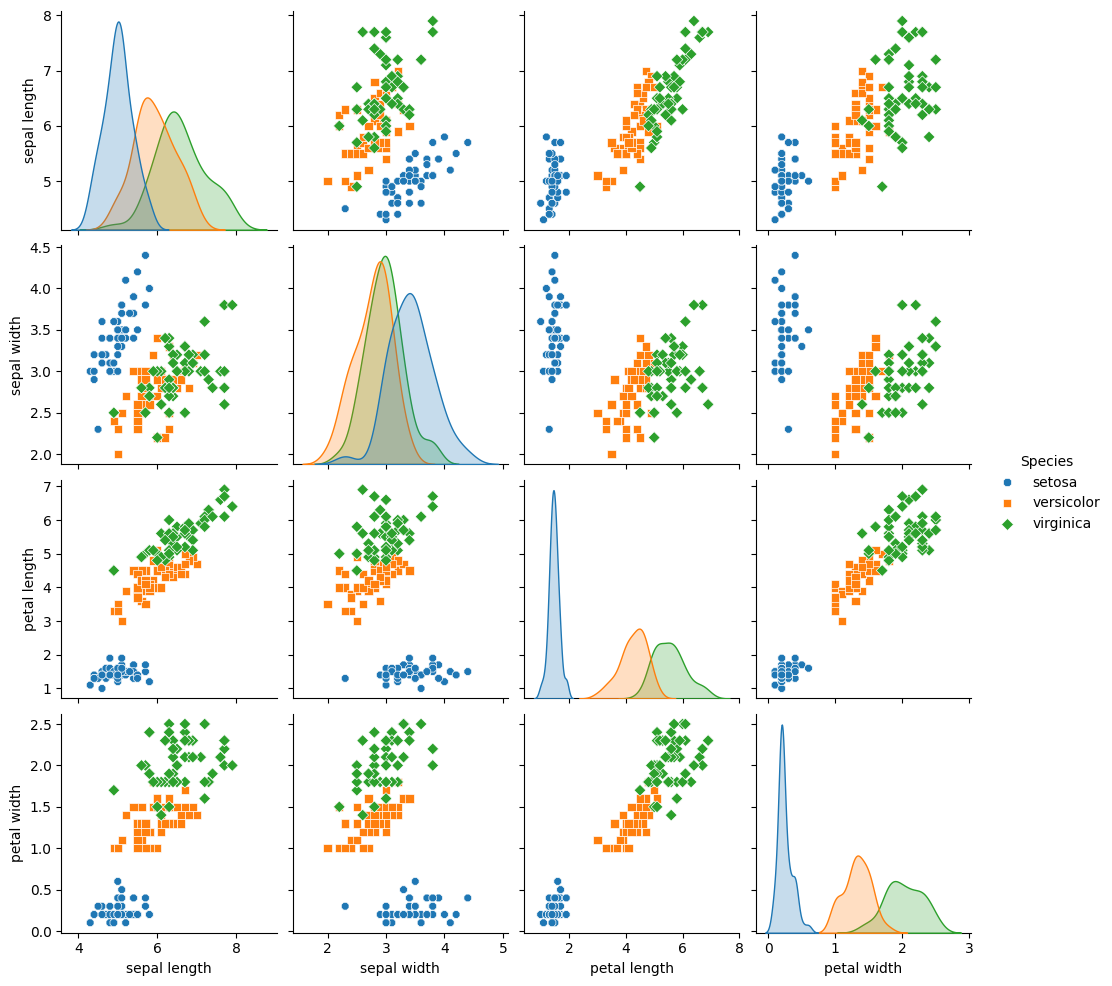

In [8]:
sns.pairplot(df.drop(['target'], axis=1), hue='Species', height=2.5, markers = ["8","s","D"])


In [9]:
#Using the elbow method to estimate the value k
kmeans5 = KMeans(n_clusters=5, init = 'k-means++', random_state = 0)
y = kmeans5.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
kmeans5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


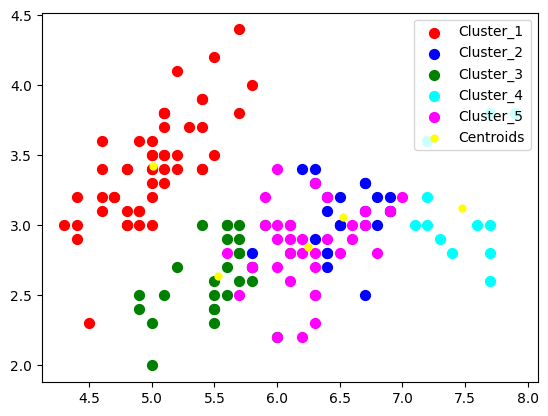

In [11]:
y_means = kmeans5.fit_predict(x)
# solution, convert the dataframe to a np.array
#Visualizing the clusters for k=5
X = np.array(x) #that all
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',  label='Cluster_1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',    label='Cluster_2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',   label='Cluster_3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',    label = 'Cluster_4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s=25, c='yellow', label='Centroids')
plt.legend()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

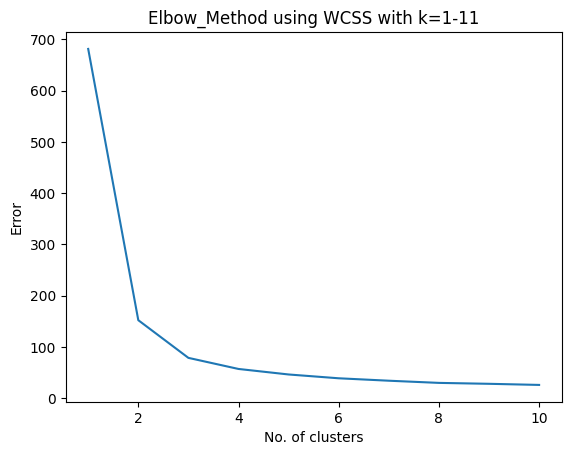

In [12]:
Error =[]
for i in range(1, 11):
  kmeans11 = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter = 300, random_state = 0).fit(x)
  kmeans11.fit(x)
  Error.append(kmeans11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11),Error)
plt.title('Elbow_Method using WCSS with k=1-11')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.show


In [13]:
#now instantiate and fit out K means cluster model
#use three clusters and a random state to 21
kmeans3 = KMeans(n_clusters = 3, random_state=21)
y = kmeans3.fit_predict(x)
print(y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
#with the following code we can identify the center point of the data
kmeans3.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 1.0, 'Predicted')

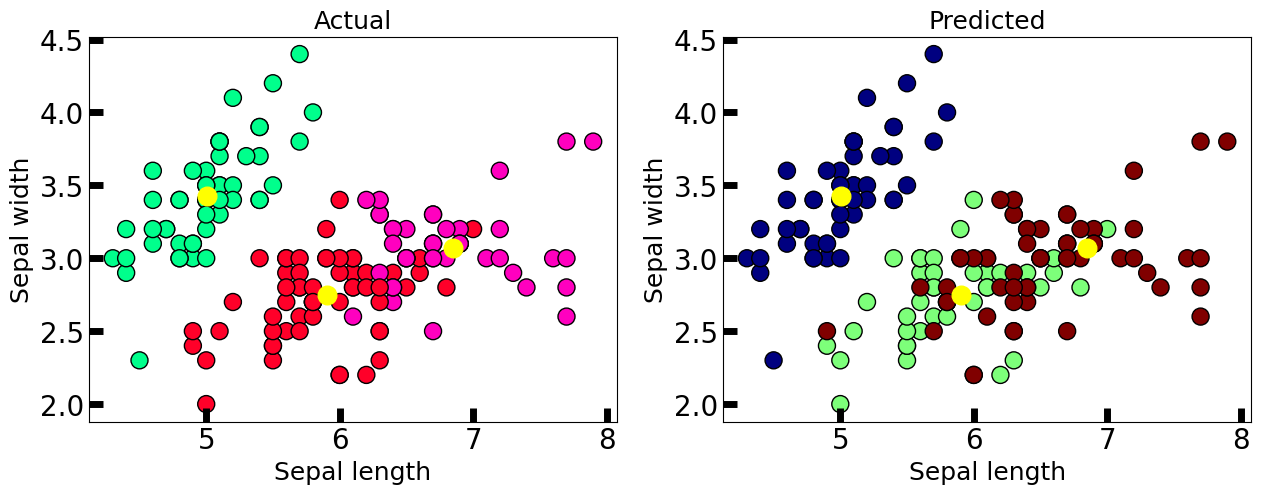

In [15]:
#now compare original data vs clustered result
from pylab import *
rcParams['figure.figsize'] = 15,5
fig, axes = plt.subplots(1, 2,)
axes[0].scatter(x=df['sepal length'], y=df['sepal width'], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x=df['sepal length'], y=df['sepal width'], c=iris.target, cmap='jet', edgecolor='k', s=150)
axes[0].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=180, c='yellow', label='Centroids')
axes[1].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=180, c='yellow', label='Centroids')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Text(0.5, 1.0, 'Predicted')

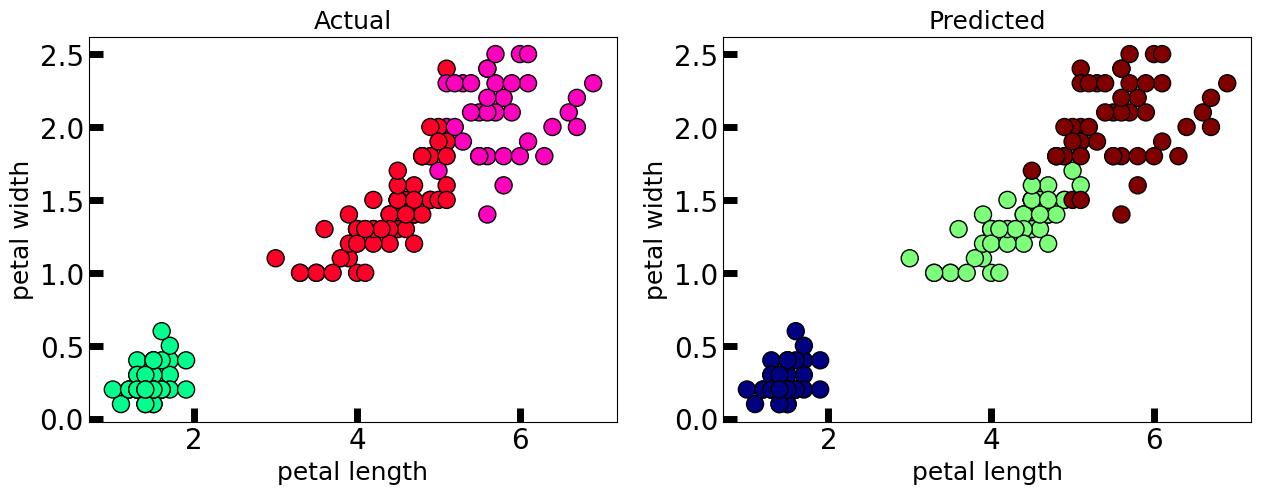

In [16]:
#Comparing the actual petal length and petal width with predicted
from pylab import *
rcParams['figure.figsize'] = 15,5
fig, axes = plt.subplots(1, 2,)
axes[0].scatter(x=df['petal length'], y=df['petal width'], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(x=df['petal length'], y=df['petal width'], c=iris.target, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('petal length', fontsize=18)
axes[0].set_ylabel('petal width', fontsize=18)
axes[1].set_xlabel('petal length', fontsize=18)
axes[1].set_ylabel('petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [17]:
pd.crosstab(iris.target,y)


col_0,0,1,2
row_0,,,
0,0,50,0
1,48,0,2
2,14,0,36
